In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

**Figure 2.1**

In [2]:
data = pd.read_csv('data/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


(-5, 110)

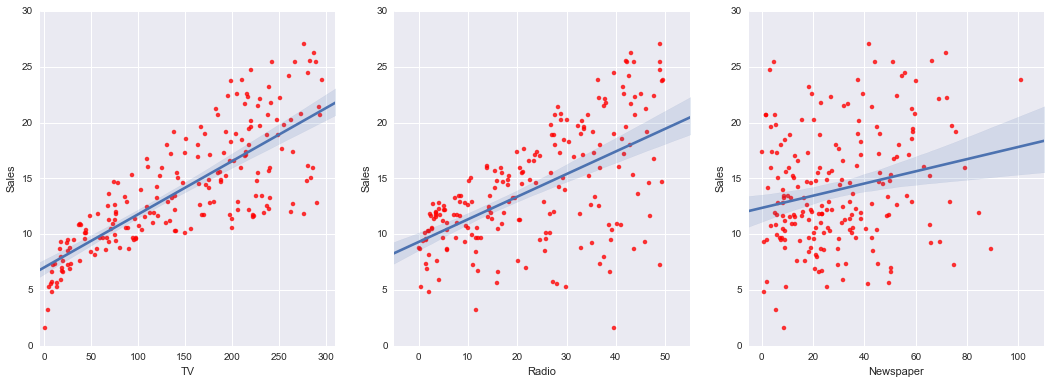

In [3]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.regplot(x='TV', y='Sales', data=data, scatter_kws={'color': 'red'})
plt.xlim(-5, 310)
plt.subplot(132)
sns.regplot(x='Radio', y='Sales', data=data, scatter_kws={'color': 'red'})
plt.xlim(-5, 55)
plt.subplot(133)
sns.regplot(x='Newspaper', y='Sales', data=data, scatter_kws={'color': 'red'})
plt.xlim(-5, 110)

# Subsquent figures use data that is not available

##Exercise 2.8

In [4]:
# 8a
college = pd.read_csv('data/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
# 8b
college.rename(columns={'Unnamed: 0': 'Name'}, inplace=True)
college.head(2)

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [6]:
# 8c i
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


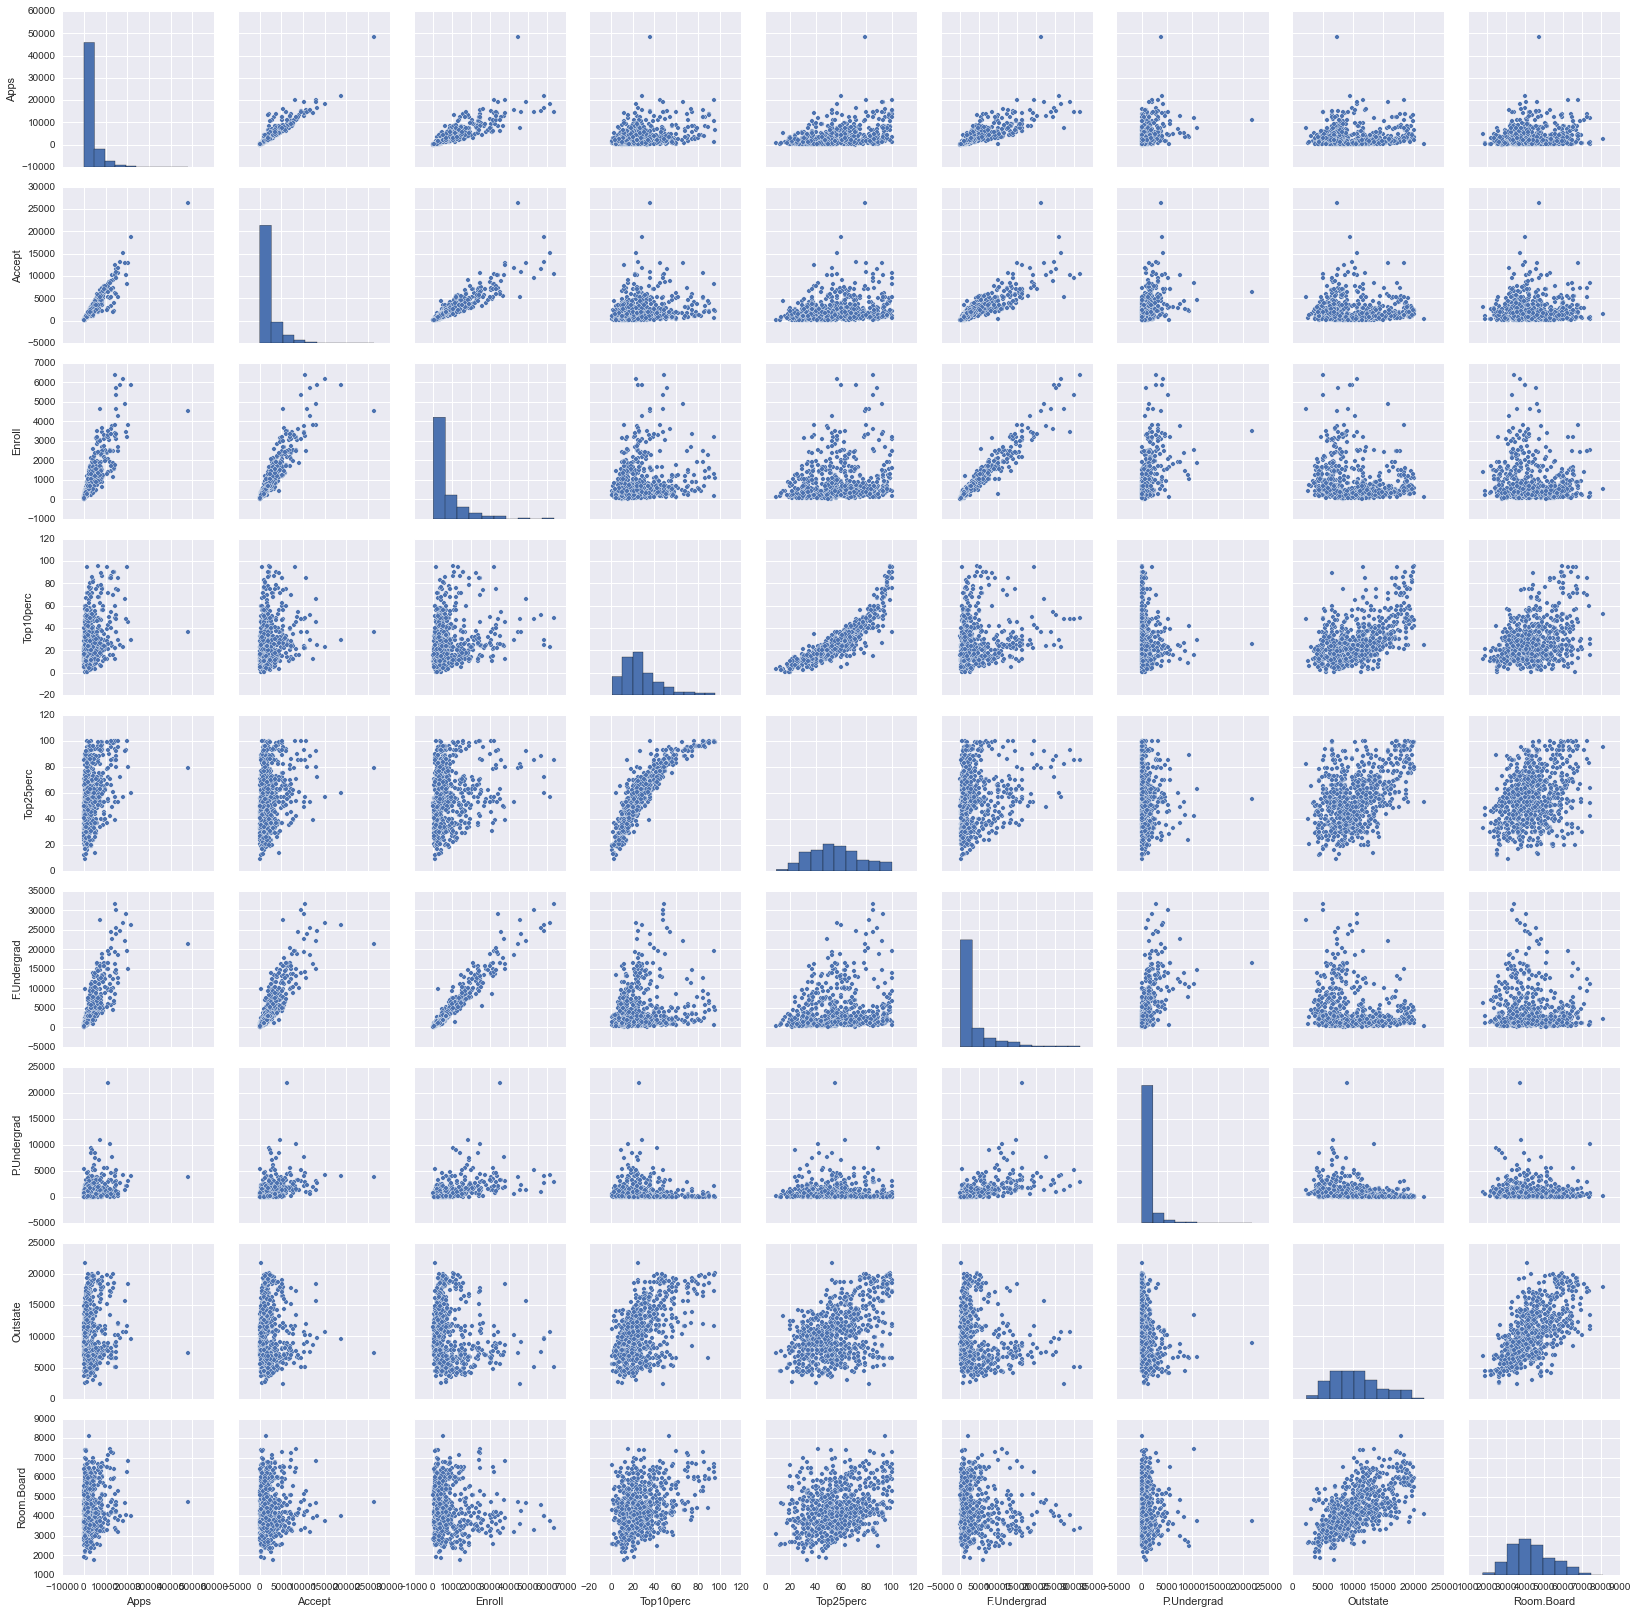

In [7]:
# 8c ii
sns.pairplot(college.iloc[:, 2:11])

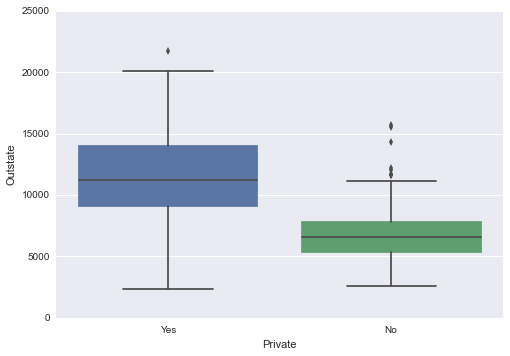

In [8]:
# 8c iii
sns.boxplot(x='Private', y='Outstate', data=college)

No     699
Yes     78
dtype: int64


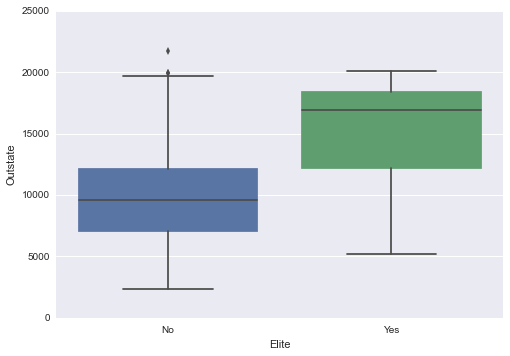

In [9]:
# 8c iv
college.loc[college.loc[:, 'Top10perc'] > 50, 'Elite'] = 'Yes'
college.loc[college.loc[:, 'Top10perc'] <= 50, 'Elite'] = 'No'
print(college.Elite.value_counts())
sns.boxplot(x='Elite', y='Outstate', data=college)

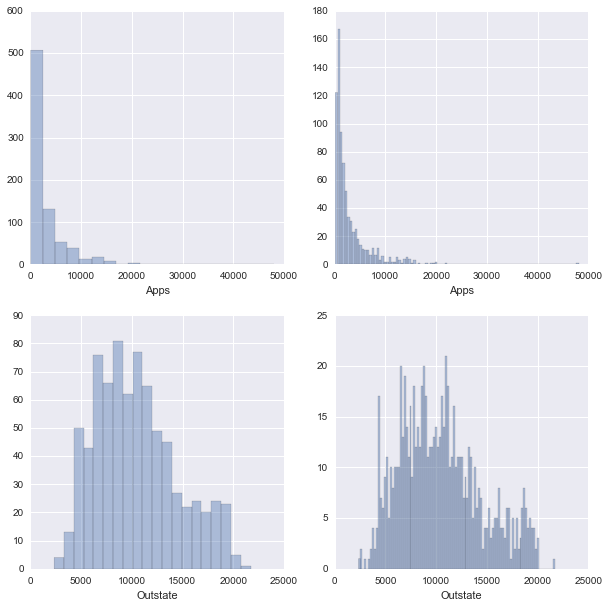

In [10]:
# 8c v
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(college['Apps'], kde=False, bins=20)
plt.subplot(222)
sns.distplot(college['Apps'], kde=False, bins=100)
plt.subplot(223)
sns.distplot(college['Outstate'], kde=False, bins=20)
plt.subplot(224)
sns.distplot(college['Outstate'], kde=False, bins=100)

In [11]:
# 9a skipped
# 9b
